In [1]:
# KERAS를 살펴봅시다.
# 손실함수는 예측값과 정답데이터를 비교하는 함수입니다.
# 손실함수는 여러 이름을 가지고 있습니다. loss, error, objective, cost function으로 불립니다.
# 둘 중 하나의 문제를 처리할 때는 Binary crossentropy, 여러 문제를 처리할 때는 categorical crossentropy를 사용합니다.
# 가중치는 하나의 레이어마다 적용되고 가장 적절한 가중치를 찾는 것이 딥러닝의 최종목표입니다. 그리고 결과를 보고 다시 가중치를 업데이트 하는 것을 옵티마이저라고 합니다.
# 역전파(Backpropagation)는 손실함수를 가지고 다시 뒤로 돌아가는 것을 말합니다. 딥러닝에서는 반복이 중요합니다. 어떤 방법으로 반복할지가 중요합니다.
# 그렇다고 무한정 반복하는 것은 좋지 않습니다. 테스트 데이터에 오버피팅이 생길 수 있기 때문입니다. 오버피팅과 언더피팅 사이의 최적화된 가중치를 찾아야 합니다.
# 미분을 하는 이유는 하나의 점에 기울기를 파악하기 위해서 입니다.

In [2]:
import keras
keras.__version__

'2.12.0'

In [3]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [4]:
train_images.shape  # 학습용 데이터의 형태를 살펴봅시다. 레이어가 6만장이고 28*28이 사각형의 크기입니다.

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape  # 테스트 데이터의 형태를 살펴봅시다.

(10000, 28, 28)

In [7]:
import matplotlib.pyplot as plt
digit=train_images[4]  # 학습용 데이터의 5번째 이미지를 가지고 와 봅시다.
print(digit)  # 그레이스케일 표현입니다. 0이 될 수록 연해지고 255가 가장 까맣습니다.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

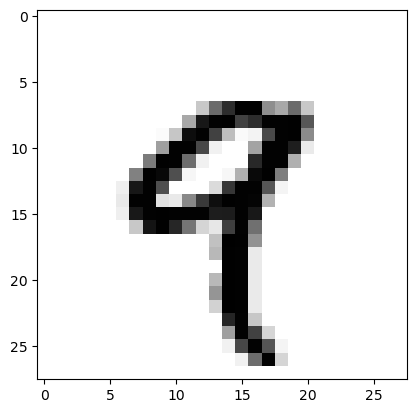

In [8]:
plt.imshow(digit,cmap=plt.cm.binary)  # 위의 그레이스케일을 사진으로 출력해봅시다.

In [9]:
# 이제 인공신경망을 만들어봅시다.
from keras import models
from keras import layers

network = models.Sequential()  # 인공신경망을 담을 하나의 박스를 만듭시다.
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))  # 인풋데이터는 가장 기본 방법인 ReLU를 사용합니다.
network.add(layers.Dense(10,activation='softmax'))  # 결과값이 다중이기 때문에 소프트맥스를 활용합니다.
network.compile(optimizer='rmsprop',  # 최적화 방법은 하나의 공을 굴려 가속도를 줘 로컬 미니멈이 아닌 글로벌 미니멈을 찾는 방법으로 합시다.
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
train_images=train_images.reshape((60000,28*28))
train_images.shape

(60000, 784)

In [11]:
# 훈련데이터의 형식을 바꿔줍니다.
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [12]:
# 라벨 데이터를 원핫인코딩을 하여 카테고리 데이터로 변환합니다.
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
# 이제 이 신경망으로 데이터를 학습시켜 봅시다.
network.fit(train_images, train_labels, epochs=5, batch_size=128)
# CPU를 뇌로 보고 메모리를 책상으로 봅니다. 메모리 안에서 작업하는 것을 이터레이터라고 합니다.
# epoch는 전체 사이클이 돌아가는 횟수이고 batch 사이즈는 작업이 가능한 메모리 안에서 몇 번 쪼개서 함수를 처리할 것인지를 정해주는 것입니다. 예를 들면 전체 메모리가 100이라고 했을 때 배치사이즈를 10으로 지정하면 데이터를 10번 쪼개서 할 수 있는 만큼 잘라서 수행합니다.

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2692 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1081 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0712 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0380 - accuracy: 0.9888


In [14]:
# 위 과정까지 다 하면 테스트 데이터에 관한 검증은 끝난 것입니다.
# 테스트 데이터 학습이 끝나면 반드시 테스트 데이터로 테스트 정확도까지 검증해야 합니다. 그래야 학습 데이터에 오버피팅되지 않게 학습시킬 잣대를 세울 수 있습니다.
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0667 - accuracy: 0.9801
test acc: 0.9800999760627747


In [15]:
# 다음은 영화리뷰 데이터인 IMDB데이터를 이용하여 순환신경망을 만들어봅시다.
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)  # 출현빈도가 높은 단어 1000개를가지고 와서 학습데이터와 테스트데이터로 쪼개봅시다.

In [16]:
train_data.shape

(25000,)

In [17]:
train_data[0]  # 첫번째 데이터를 가지고 와보니 imdb데이터는 문자데이터를 숫자로 변환한 데이터입니다.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
train_labels[0:5]  # 1은 긍정적 리뷰를 0은 부정적 리뷰를 나타냅니다.

array([1, 0, 0, 1, 0], dtype=int64)

In [19]:
# 리뷰 글자수가 총 몇개인지 알아봅시다.
i=0
for sequence in train_data:
    i=i+1
    
print(i)

25000


In [20]:
for sequence in train_data:
    print(max(sequence))  # 결과 값에서 만(10000)이 넘는 숫자는 없습니다. 왜냐면 위에서 빈도가 높은 값을 10000까지만 가지고 왔기 때문입니다.

7486
9837
6905
9941
7224
7982
9363
9820
7612
8419
8914
7412
9667
9106
6640
9671
9263
9935
8742
9580
9859
8793
7609
9462
9075
8614
8887
5898
9637
9212
9771
9209
8257
7778
9877
9753
7015
9902
8427
8867
8406
9579
9529
7056
7023
9922
5811
9124
9910
8795
7799
7146
9978
7999
9565
9731
9095
9888
5247
9655
4852
9939
9018
9885
7239
9636
9389
9561
9673
9147
9956
9448
8520
9360
9765
9025
9928
8352
9960
7320
8318
7881
9715
9851
9266
9055
8894
9719
9271
7311
8791
9918
9486
9867
9283
7707
9133
9055
9978
8013
8448
8700
9906
7517
9962
6266
6903
9815
9976
9273
9413
8931
8631
9685
9419
9964
7361
9052
9482
9643
9865
9819
7181
2775
9709
9977
8916
4431
9700
6532
8836
9926
6781
7614
5418
8881
9841
9615
9072
9831
6891
8827
9019
9583
8776
8534
9853
8368
8931
9830
8084
5991
7901
9671
6817
9937
7960
7676
8653
6866
6325
9737
9771
5636
8557
7371
9995
8689
9294
8893
8462
6975
9665
8802
7608
9933
9738
9418
7542
7073
8448
9570
9916
9315
7806
9901
9388
9723
9049
9985
8427
8376
9985
9584
9426
9840
9208
8648
9675
9608


9552
9233
9472
9233
9906
9566
9848
9618
8762
9255
8671
9597
9967
9700
9462
9770
7837
7467
9341
9351
9418
5967
7218
8878
7424
9616
9947
6764
7357
3825
9770
5529
9654
9776
9499
9110
9948
6433
8727
4251
9910
6121
9207
8987
9382
9262
8911
7052
9313
8822
9350
8163
9355
5085
9750
9644
9708
9295
8016
5703
7172
8858
8924
8966
9931
9730
8951
3582
7146
9179
9959
9275
6947
9817
9977
8239
9472
9956
9957
9941
9983
9497
8403
9994
8996
8128
7527
8657
9241
8767
9877
9597
7714
8801
6320
5719
9360
9621
9482
9342
9367
9247
1964
8453
9843
9253
9466
9027
7976
9455
9650
9474
8642
9697
9954
4435
9114
9970
7594
9674
6854
9445
7976
7406
9833
9368
9997
9673
9646
8731
8668
9480
9468
9991
9631
9514
9079
9556
7352
8298
6702
9269
9375
9604
9981
9749
9948
6383
9720
9690
7758
9988
8751
7634
8850
9567
8847
9363
9900
8520
3555
9575
9902
9626
9898
7236
6561
9926
8514
7499
9412
9746
9394
9916
9078
9357
9432
7832
8886
9604
8731
8186
9984
8483
9274
8631
6175
8767
8580
9214
8672
6567
9784
9401
9766
9737
7717
9466
9509
3963


In [21]:
max([max(sequence) for sequence in train_data])  # 학습데이터의 최대값을 구해보면 10000 미만인 걸 알 수 있습니다.

9999

In [22]:
# 적당한 크기로 작업 레이어를 생성해봅시다.
import numpy as np

def vectorize_sequences(sequences, dimension=10000):  # 데이터의 길이가 세로, 차원인 10000이 가로길이 입니다.
    result = np.zeros((len(sequences),dimension))  # 생성한 배열 안을 전부 0으로 채웁니다.
    
    print(result.shape)

    for i, sequence in enumerate(sequences):  # enumerate는 열거하겠다는 뜻입니다. 앞에 인덱스를 붙여서 하나씩 출력하는데 단어가 있는 자리에 0대신 1을 입력합니다.
        result[i, sequence] = 1
    return result

In [23]:
# 이 데이터는 문자 데이터를 숫자 데이터로 가지고 온 것이므로 이 데이터에 포함된 숫자는 계산하지 않아도 된다는 명령을 컴퓨터에게 내려줍니다.
# 그러기 위해서 데이터를 벡터라이즈합니다.
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
# 라벨 데이터도 실수형으로 바꿔줍니다. 계산하지 말라는 뜻입니다.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [26]:
y_train[0]

1.0

In [27]:
# 이제 신경망을 제작해봅시다.
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # 결과값은 긍정 또는 부정으로 2진분류이기 때문에 최종 레이어는 1개만 있으면 됍니다.
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])  # 평가 기준은 정확도로 합니다.

In [28]:
# 이번엔 학습(train)데이터와, 테스트 데이터와 검증(validation) 데이터 총 3가지로 나눠봅니다.
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [29]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))  # 배치사이즈를 설정하고 학습이 잘 되고 있는지 검증데이터를 넣어 살펴보는 것 까지 해봅시다.

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5459 - accuracy: 0.7801 - val_loss: 0.4259 - val_accuracy: 0.8591
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3521 - accuracy: 0.8881 - val_loss: 0.3314 - val_accuracy: 0.8810
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2629 - accuracy: 0.9149 - val_loss: 0.2966 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2116 - accuracy: 0.9289 - val_loss: 0.2813 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1788 - accuracy: 0.9403 - val_loss: 0.2781 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1534 - accuracy: 0.9515 - val_loss: 0.2869 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1328 - accuracy: 0.9570 - val_loss: 0.2876 - val_accuracy: 0.8866
Epoch 8/20
30

In [30]:
history_dic = history.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

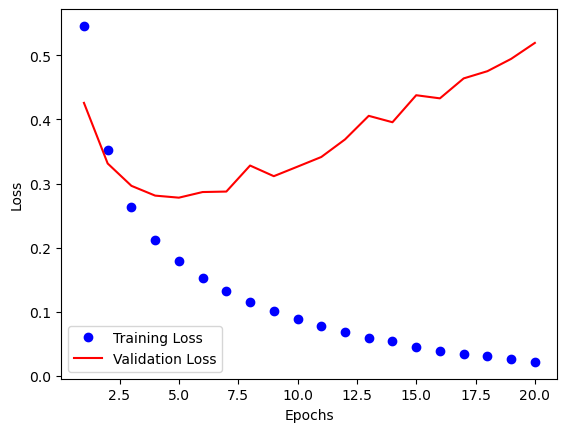

In [31]:
# 학습데이터의 손실률과 검증데이터의 손실률을 비교하는 그래프를 시각화 해봅시다.
import matplotlib.pyplot as plt

acc=history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

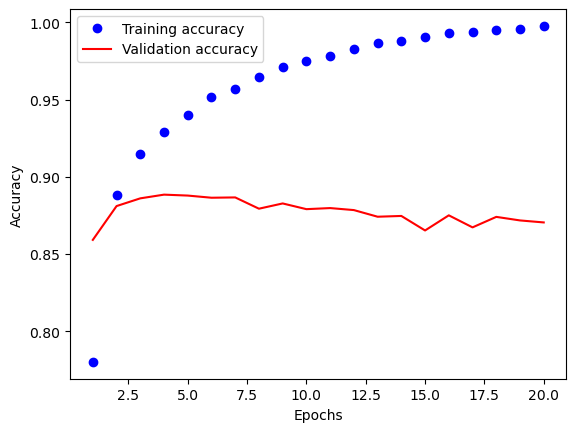

In [32]:
# 반복에 따른 정확도를 시각화 해봅시다.
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# 반복을 할 수록 학습 데이터에만 최적화 되어 정확도가 올라가지만 검증 데이터의 경우 일정 반복 이후에는 정확도가 올라가지 않습니다. 이를 학습데이터에 오버피팅 되있다고 합니다.

In [33]:
# 4번째 이후로는 정확도가 올라가지 않는 것을 위에서 확인했으니 4번만 반복시켜 모델을 완성해봅시다.
# 그냥 반복 코드를 쓸 경우 위의 데이터를 다시 쓰게 되므로 데이터를 초기화하기 위해 다시 불러와서 작업합니다.
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [34]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [35]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 37ms/step - loss: 0.5333 - accuracy: 0.7813 - val_loss: 0.4188 - val_accuracy: 0.8586
Epoch 2/4
30/30 [==============================] - 1s 18ms/step - loss: 0.3375 - accuracy: 0.8949 - val_loss: 0.3432 - val_accuracy: 0.8674
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2514 - accuracy: 0.9189 - val_loss: 0.2883 - val_accuracy: 0.8891
Epoch 4/4
30/30 [==============================] - 1s 18ms/step - loss: 0.2014 - accuracy: 0.9347 - val_loss: 0.2807 - val_accuracy: 0.8858


In [36]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.35238653],
       [0.9979558 ],
       [0.95972866],
       ...,
       [0.13385263],
       [0.19664973],
       [0.6358161 ]], dtype=float32)

In [37]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))
# 지금까지 이진분류를 해봤으니 다음 장에서 다중분류를 해봅시다.

782/782 [==============================] - 3s 3ms/step - loss: 0.2917 - accuracy: 0.8835
loss=0.29167884588241577, accuracy=0.8834800124168396
